## Denoising images using autoencoders

Denoising autoencoders application is very versatile and can be focused on cleaning old stained scanned images or contribute to feature selection efforts in cancer biology. Regarding, old images encoder compression contributes to an output, which helps model reconstructing the actual image using robust latent representations by the decoder.

## So, what are autoencoders?
At a high level, an autoencoder contains an encoder and decoder. These two parts function automatically and give rise to the name “autoencoder”. Encoder transforms high-dimensional input into lower-dimension (latent state, where the input is more compressed), while a decoder does the reverse encoder job on the encoded outcome and reconstructs the original image. It should be noted that traditional autoencoders (vanilla autoencoders) cannot reconstruct images from a latent state.

<img src='Image/denoise2.png'>

### Importing required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

Mount the data from google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Loading data

- Store the path of each folder (train_path, train_cleaned_path, test_path).
- Get the name of each image and store it in a list.
- Then load the images.

In [4]:
# Path of each floder
train_path = '/content/drive/MyDrive/Colab Notebooks/denosing autoencoder/train'
train_cleaned_path = '/content/drive/MyDrive/Colab Notebooks/denosing autoencoder/train_cleaned'
test_path = '/content/drive/MyDrive/Colab Notebooks/denosing autoencoder/test'

In [12]:
# store image names in list for later use
train_imgs = os.listdir(train_path)
train_cleaned_imgs = os.listdir(train_cleaned_path)
test_imgs = os.listdir(test_path)

In [11]:
# Check the list
train_cleaned_img[:10]

['11.png',
 '81.png',
 '83.png',
 '3.png',
 '92.png',
 '2.png',
 '72.png',
 '38.png',
 '15.png',
 '6.png']

In [5]:
# prepare function
def process_image(path):
    """
    Input
    path: The path of the image we want to read.

    Output
    img: the image we read in gray scale and with size (420, 540)
    """
    img = cv2.imread(path)
    img = np.asarray(img, dtype="float32")
    img = cv2.resize(img, (540, 420))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (420, 540, 1))
    return img

In [13]:
# preprocess images
train = []
train_cleaned = []
test = []

for img in sorted(train_imgs):
    train.append(process_image(train_path + '/' + img))

for img in sorted(train_cleaned_imgs):
    train_cleaned.append(process_image(train_cleaned_path + '/' + img))

for img in sorted(test_imgs):
    test.append(process_image(test_path + '/' + img))

display an image and the corresponding cleaned one.

Text(0.5, 1.0, 'Noise image: 56.png')

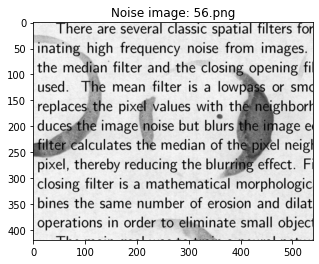

In [14]:
plt.imshow(train[10][:,:,0], cmap='gray')
plt.title('Noise image: {}'.format(train_img[10]))

Text(0.5, 1.0, 'Denoised image: 56.png')

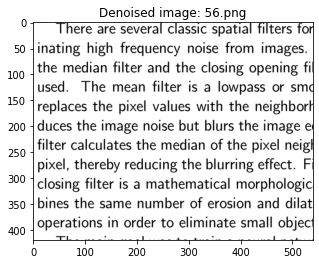

In [15]:
plt.imshow(train_cleaned[10][:,:,0], cmap='gray')
plt.title('Denoised image: {}'.format(train_img[10]))

convert the (train, train_cleaned and test) lists to numpy array and then split the data into train and dev set

In [16]:
# convert list to numpy array
X_train = np.asarray(train)
Y_train = np.asarray(train_cleaned)
X_test = np.asarray(test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3)

### Build the model

In [17]:
model = Sequential()

# Encoding
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(420, 540, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.5))

# Decoding
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(UpSampling2D((2, 2)))

# Output Layer is an image so we use Conv2D filter 1
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam' , loss='mean_squared_error', metrics=['mse'])

early stopping 

In [18]:
callback = EarlyStopping(monitor='loss', patience=30)

Train the model

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=200, batch_size=16, verbose=1, callbacks=[callback])

Epoch 1/200
7/7 [==============================] - 43s 5s/step - loss: 0.1992 - mse: 0.1992 - val_loss: 0.1926 - val_mse: 0.1926
Epoch 2/200
7/7 [==============================] - 17s 2s/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.1642 - val_mse: 0.1642
Epoch 3/200
7/7 [==============================] - 17s 2s/step - loss: 0.0983 - mse: 0.0983 - val_loss: 0.1264 - val_mse: 0.1264
Epoch 4/200
7/7 [==============================] - 17s 2s/step - loss: 0.0872 - mse: 0.0872 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 5/200
7/7 [==============================] - 17s 2s/step - loss: 0.0798 - mse: 0.0798 - val_loss: 0.0880 - val_mse: 0.0880
Epoch 6/200
7/7 [==============================] - 17s 2s/step - loss: 0.0742 - mse: 0.0742 - val_loss: 0.0787 - val_mse: 0.0787
Epoch 7/200
7/7 [==============================] - 17s 2s/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0714 - val_mse: 0.0714
Epoch 8/200
7/7 [==============================] - 17s 2s/step - loss: 0.0658 - mse: 0.0658 - val

Check how loss & mse went down

In [ ]:
epoch_mse = history.history['mse']
epoch_val_mse = history.history['val_mse']

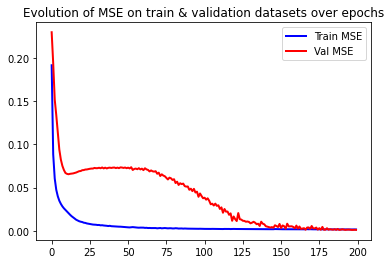

In [ ]:
plt.plot(epoch_mse, 'b-', linewidth=2, label='Train MSE')
plt.plot(epoch_val_mse, 'r-', linewidth=2,label='Val MSE')
plt.title('Evolution of MSE on train & validation datasets over epochs')
plt.legend(loc='best')

predict (clean) test images

In [ ]:
Y_test = model.predict(X_test, batch_size=16)

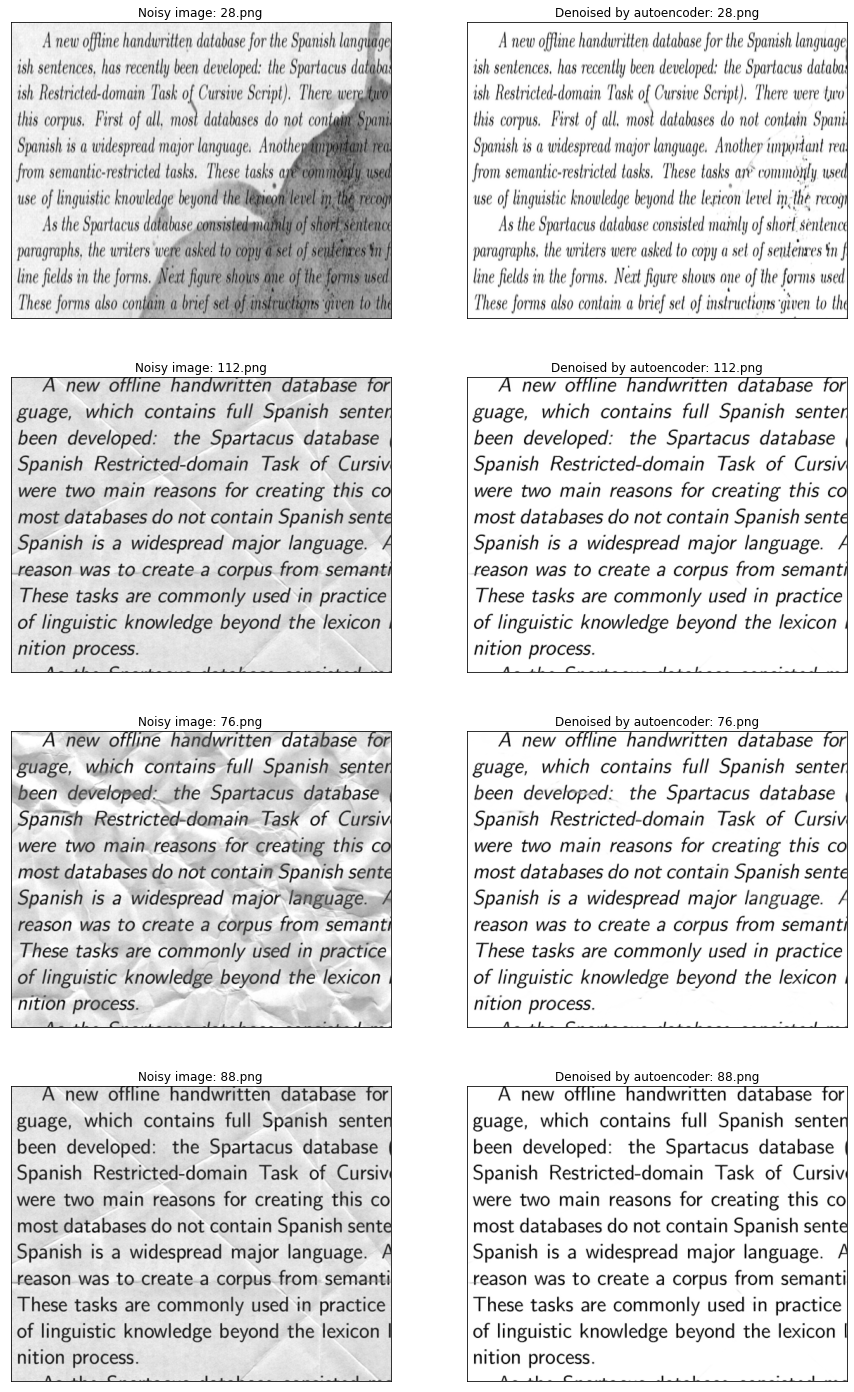

In [ ]:
plt.figure(figsize=(15,25))
for i in range(0,8,2):
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i][:,:,0], cmap='gray')
    plt.title('Noisy image: {}'.format(test_img[i]))
    
    plt.subplot(4,2,i+2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Y_test[i][:,:,0], cmap='gray')
    plt.title('Denoised by autoencoder: {}'.format(test_img[i]))

plt.show()